In [34]:

import pandas as pd
file_path = '/Users/shubanranganath/Desktop/hackirvine-proj/2022_Q1_OR_Utilization.csv'
date_columns = ['Date', 'OR Schedule','Wheels In', 'Start Time','End Time','Wheels Out']
data = pd.read_csv(file_path, parse_dates=date_columns)
data['Service'] = data['Service'].astype("string")
data['CPT Description'] = data['CPT Description'].astype("string")
data['Actual_time'] = (data['End Time'] - data['Start Time']).dt.total_seconds().div(60).astype(int)
data.dtypes

index                         int64
Encounter ID                  int64
Date                 datetime64[ns]
OR Suite                      int64
Service                      string
CPT Code                      int64
CPT Description              string
Booked Time (min)             int64
OR Schedule          datetime64[ns]
Wheels In            datetime64[ns]
Start Time           datetime64[ns]
End Time             datetime64[ns]
Wheels Out           datetime64[ns]
Actual_time                   int64
dtype: object

In [31]:
file = open(r"2022_Q1_OR_Utilization.csv")
text = file.read()
text = text.split()
for i in range(len(text)):
    text[i] = text[i].replace('"',"")

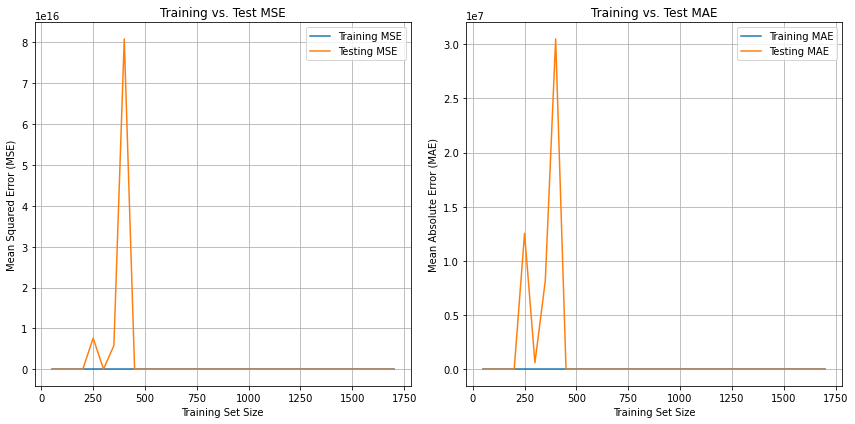

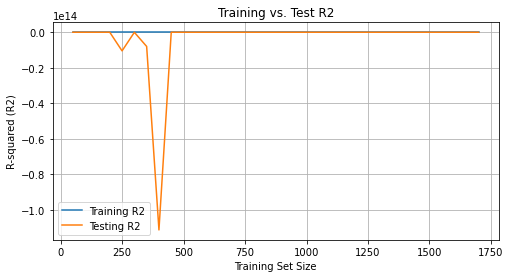

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset and preprocess it (handle missing values, etc.)

# Select the features and target variable
features = ['CPT Code', 'Booked Time (min)', 'Service', 'CPT Description']
X = data[features]
y = data['Actual_time']

# Apply one-hot encoding to categorical features
X_encoded = pd.get_dummies(X, columns=['Service', 'CPT Description'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Lists to store training and testing errors for each iteration
train_errors_mse = []
test_errors_mse = []
train_errors_mae = []
test_errors_mae = []
train_r2_scores = []
test_r2_scores = []

# Train the model multiple times with varying training set sizes
training_set_sizes = np.arange(50, len(X_train), 50)  # You can adjust the range
for size in training_set_sizes:
    # Train the model on a subset of the training data
    model.fit(X_train[:size], y_train[:size])

    # Make predictions on both training and testing data
    y_train_pred = model.predict(X_train[:size])
    y_test_pred = model.predict(X_test)

    # Calculate training and testing errors
    train_error_mse = mean_squared_error(y_train[:size], y_train_pred)
    test_error_mse = mean_squared_error(y_test, y_test_pred)
    train_error_mae = mean_absolute_error(y_train[:size], y_train_pred)
    test_error_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train[:size], y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_errors_mse.append(train_error_mse)
    test_errors_mse.append(test_error_mse)
    train_errors_mae.append(train_error_mae)
    test_errors_mae.append(test_error_mae)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot the training vs. test error chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_set_sizes, train_errors_mse, label='Training MSE')
plt.plot(training_set_sizes, test_errors_mse, label='Testing MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Test MSE')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(training_set_sizes, train_errors_mae, label='Training MAE')
plt.plot(training_set_sizes, test_errors_mae, label='Testing MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training vs. Test MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display R-squared scores
plt.figure(figsize=(8, 4))
plt.plot(training_set_sizes, train_r2_scores, label='Training R2')
plt.plot(training_set_sizes, test_r2_scores, label='Testing R2')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared (R2)')
plt.title('Training vs. Test R2')
plt.legend()
plt.grid(True)
plt.show()

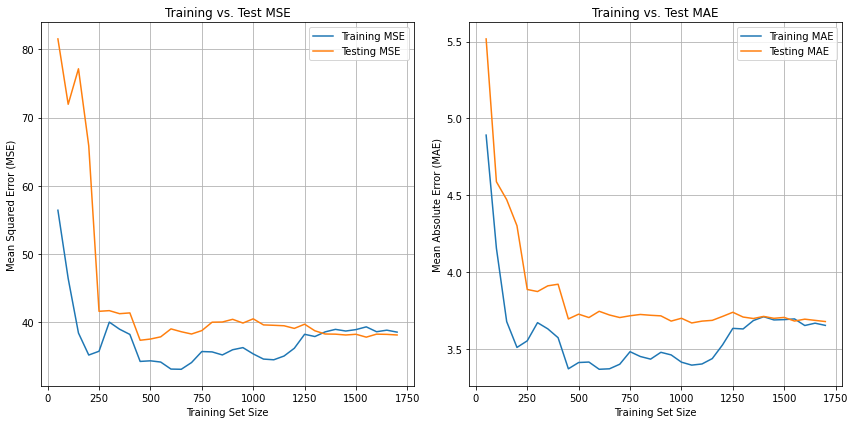

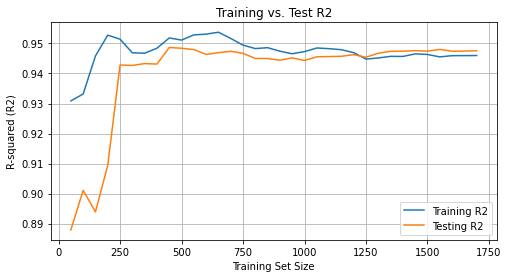

Final Testing MSE: 37.93756212544725
Final Testing MAE: 3.6701296622806003
Final Testing R2: 0.94783459518692


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset and preprocess it (handle missing values, etc.)

# Select the features and target variable
features = ['CPT Code', 'Booked Time (min)', 'Service', 'CPT Description']
X = data[features]
y = data['Actual_time']

# Label encode categorical features
categorical_features = ['Service', 'CPT Description']
X_encoded = X.copy()
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    X_encoded[feature] = le.fit_transform(X_encoded[feature])
    label_encoders[feature] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Lists to store training and testing errors for each iteration
train_errors_mse = []
test_errors_mse = []
train_errors_mae = []
test_errors_mae = []
train_r2_scores = []
test_r2_scores = []

# Train the model multiple times with varying training set sizes
training_set_sizes = np.arange(50, len(X_train), 50)  # You can adjust the range
for size in training_set_sizes:
    # Train the model on a subset of the training data
    model.fit(X_train[:size], y_train[:size])

    # Make predictions on both training and testing data
    y_train_pred = model.predict(X_train[:size])
    y_test_pred = model.predict(X_test)

    # Calculate training and testing errors
    train_error_mse = mean_squared_error(y_train[:size], y_train_pred)
    test_error_mse = mean_squared_error(y_test, y_test_pred)
    train_error_mae = mean_absolute_error(y_train[:size], y_train_pred)
    test_error_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train[:size], y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_errors_mse.append(train_error_mse)
    test_errors_mse.append(test_error_mse)
    train_errors_mae.append(train_error_mae)
    test_errors_mae.append(test_error_mae)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot the training vs. test error chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_set_sizes, train_errors_mse, label='Training MSE')
plt.plot(training_set_sizes, test_errors_mse, label='Testing MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Test MSE')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(training_set_sizes, train_errors_mae, label='Training MAE')
plt.plot(training_set_sizes, test_errors_mae, label='Testing MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training vs. Test MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display R-squared scores
plt.figure(figsize=(8, 4))
plt.plot(training_set_sizes, train_r2_scores, label='Training R2')
plt.plot(training_set_sizes, test_r2_scores, label='Testing R2')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared (R2)')
plt.title('Training vs. Test R2')
plt.legend()
plt.grid(True)
plt.show()

# Final model evaluation
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Testing MSE: {final_mse}")
print(f"Final Testing MAE: {final_mae}")
print(f"Final Testing R2: {final_r2}")


In [46]:
print(X_encoded)

      CPT Code  Booked Time (min)  Service  CPT Description
0        28110                 90        7               23
1        28055                 60        7               21
2        28297                150        7               18
3        28296                120        7                5
4        27445                120        4                3
...        ...                ...      ...              ...
2167     69421                 60        5               20
2168     69421                 60        5               20
2169     27445                120        4                3
2170     27445                120        4                3
2171     27130                120        4                2

[2172 rows x 4 columns]


In [48]:
import joblib

# Function to export the trained model to a file
def export_model(model, filename):
    try:
        joblib.dump(model, filename)
        print(f"Model saved to {filename}")
    except Exception as e:
        print(f"Error saving model: {str(e)}")

# Function to get actual time estimates from input features
def get_actual_time_estimate(input_features, label_encoders, trained_model):
    try:
        # Create a DataFrame with the input features
        input_df = pd.DataFrame(input_features, columns=['CPT Code', 'Booked Time (min)', 'Service', 'CPT Description'])

        # Label encode categorical features using the provided label encoders
        for feature, encoder in label_encoders.items():
            input_df[feature] = encoder.transform(input_df[feature])

        # Make predictions using the trained model
        estimated_actual_time = trained_model.predict(input_df)

        return estimated_actual_time
    except Exception as e:
        print(f"Error getting actual time estimate: {str(e)}")

# Example usage:

# Export the trained model
export_model(final_model, 'trained_regression_model.joblib')

# Define input features (example values)
input_features = [
    [28110, 90, 'Podiatry', 'Partial ostectomy, fifth metatarsal head']
]

# Get actual time estimates for the input features
estimated_times = get_actual_time_estimate(input_features, label_encoders, final_model)
print("Estimated Actual Times:")
print(estimated_times)


Model saved to trained_regression_model.joblib
Estimated Actual Times:
[93.]


In [15]:
print(data)

      index  Encounter ID       Date  OR Suite      Service  CPT Code  \
0         0         10001 2022-01-03         1     Podiatry     28110   
1         1         10002 2022-01-03         1     Podiatry     28055   
2         2         10003 2022-01-03         1     Podiatry     28297   
3         3         10004 2022-01-03         1     Podiatry     28296   
4         4         10005 2022-01-03         2  Orthopedics     27445   
...     ...           ...        ...       ...          ...       ...   
2167   2167         12168 2022-03-31         7   Pediatrics     69421   
2168   2168         12169 2022-03-31         7   Pediatrics     69421   
2169   2169         12170 2022-03-31         8  Orthopedics     27445   
2170   2170         12171 2022-03-31         8  Orthopedics     27445   
2171   2171         12172 2022-03-31         8  Orthopedics     27130   

                                CPT Description  Booked Time (min)  \
0      Partial ostectomy, fifth metatarsal head      